<h1>Knjige, ki jih vsakdo mora prebrati vsaj enkrat</h1>

In [23]:
import pandas as pd 
pd.options.display.max_rows = 10
%matplotlib inline

knjige = pd.read_csv('knjige.csv') #originalni in nespremenjeni podatki 
knjige.ocena = round(knjige.ocena, 1)

#stevilo_ocen = število ocen na splošno v celotni aplikaciji GoodReads
#stevilo_volilcev = število ljudi, ki je glasovalo, da je ta knjiga ena izmed knjig na seznamu Books That Everyone Should Read At Least Once
knjige

,naslov,avtor,ocena,stevilo_volilcev
0,To Kill a Mockingbird,Harper Lee,4.3,23528
1,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.5,18191
2,Pride and Prejudice,Jane Austen,4.3,14590
3,The Diary of a Young Girl,Anne Frank,4.2,13853
4,1984,George Orwell,4.2,11391
...,...,...,...,...
2995,"Daemon (Daemon, #1)",Daniel Suarez,4.2,5
2996,"Look Homeward, Angel",Thomas Wolfe,3.9,5
2997,"Map of Bones (Sigma Force, #2)",James Rollins,4.1,5
2998,The Closing of the American Mind,Allan Bloom,3.8,8


<h3>Kateri avtor ima največ knjig med izbranimi?</h3>

In [25]:
knjige.drop(columns=['stevilo_volilcev','ocena']).groupby('avtor').count().sort_values('naslov', ascending=False).head()

,naslov
avtor,
Stephen King,42
C.S. Lewis,18
Terry Pratchett,17
William Shakespeare,16
Rick Riordan,14


Odgovor na mojo prvo vprašanje je torej avtor Stephen King, ki je napisal 42 knjig. Naslednji z največ knjigami Terry Pratchett ima 24 knjig manj med izbranimi knjigami. 
_________________________________________________________________________

<h3>Katera knjiga ima najboljšo in katera najslabšo oceno?</h3>


In [26]:
knjige.drop(columns=['stevilo_volilcev']).sort_values('ocena').head()

,naslov,avtor,ocena
2395,"Revealing Eden (Save the Pearls, #1)",Victoria Foyt,2.0
1497,Dark Rooms,Lili Anolik,3.1
1688,The Fever,Megan Abbott,3.1
2879,The Jane Austen Book Club,Karen Joy Fowler,3.1
1096,The 120 Days of Sodom,Marquis de Sade,3.1


In [4]:
knjige.drop(columns=['stevilo_ocen', 'stevilo_volilcev']).sort_values('ocena').tail()

,naslov,avtor,ocena
2658,The Devil's Deceptions: Is There Life After De...,Ginger Baum,5.0
2648,100 Bible Facts About Jesus: The Exciting way ...,Ginger Baum,5.0
2654,100 Fun Bible Facts: The Exciting way to Learn...,Ginger Baum,5.0
1951,Otuna's Flute,Maricar Banguis,5.0
2099,The Daughter Of Kurdland: A Life Dedicated to ...,Widad Akreyi,5.0


Iz obeh tabel vidimo, da je najslabše ocenjena knjiga Revealing Eden (Save the Pearls, #1), ki jo je napisala Victoria Fyot. 
Za najboljše ocenjene knjige iz seznama vidimo, da jih je kar nekaj z oceno 5.0. Najdimo vse take knjige. Te knjige so najboljše ocenjene z odlično oceno, njihove avtorje spravimo v tabelo dobri_avtorji. 

In [27]:
okrnjene_knjige = knjige.drop(columns=['stevilo_volilcev'])
okrnjene_knjige[okrnjene_knjige.ocena == 5.0]

,naslov,avtor,ocena
2011,Otuna's Flute,Maricar Banguis,5.0
2168,The Daughter Of Kurdland: A Life Dedicated to ...,Widad Akreyi,5.0
2179,"Females of Valor (The Viking's Kurdish Love, #2)",Widad Akreyi,5.0
2733,Jubal's Field Trip To Heaven: Jubal and Chanan...,Ginger Baum,5.0
2739,100 Bible Facts About Jesus: The Exciting way ...,Ginger Baum,5.0
2744,100 Fun Bible Facts: The Exciting way to Learn...,Ginger Baum,5.0
2748,The Devil's Deceptions: Is There Life After De...,Ginger Baum,5.0


In [28]:
dobri_avtorji = list(dict.fromkeys(okrnjene_knjige[okrnjene_knjige.ocena == 5.0].avtor.tolist())) 

______________________________________________________________________________________________________________________________________________________________________


<h3>Ali ima avtor knjige z najboljšo/najslabšo oceno tudi ostale knjige visoko/nizko ocenjene?</h3>

In [29]:
okrnjene_knjige[okrnjene_knjige.avtor == 'Victoria Foyt'].naslov.count()

1

Število naslovov knjig, ki jih je naspiala Victoria Foyt in so na tem seznamu, je ena. Torej so vse njene knjige, katerih podatkov obdelujem, slabo ocenjene. 

In [30]:
boljsi_avtorji = []
for avtor in dobri_avtorji:
    print(avtor, okrnjene_knjige[okrnjene_knjige.avtor == avtor].naslov.count())
    if okrnjene_knjige[okrnjene_knjige.avtor == avtor].naslov.count() > 1:
        boljsi_avtorji.append(avtor)

Maricar Banguis 1
Widad Akreyi 3
Ginger Baum 4


Iz zgornje kode vidimo, da je M. Banguis napisal eno knjigo, ki je na tem seznamu. To nam pove, da moramo končati, ko smo na vrhuncu pisanja. Tako je njegova povprečna ocena ostala enaka 5.0. 
Poglejmo še povprečja preostalih dveh avtorjev:


In [31]:
dobri_avtorji_ocena = pd.DataFrame(columns = ['avtor', 'povprecna_ocena']) 
for avtor in boljsi_avtorji:
    dobri_avtorji_ocena = dobri_avtorji_ocena.append(pd.DataFrame([ {'avtor':avtor, 'povprecna_ocena':round(okrnjene_knjige[okrnjene_knjige.avtor == avtor].ocena.mean(),2)} ])
    )
dobri_avtorji_ocena

,avtor,povprecna_ocena
0,Widad Akreyi,4.9
0,Ginger Baum,5.0


Tudi preostale knjige obeh avtorjev so ocenjene z visoko oceno, saj je povprečna ocena obeh zelo visoka.
Odgovor na vprašanje je torej pritrdilen; avtorji, ki so napisali knjige z najboljšo oceno imajo tudi preostale knjige dobro ocenjene. Analogno velja za tiste avtorje, ki so napisali slabše ocenjene knjige, saj so preostale knjige tudi slabše ocenjene.  

<h3> Ali obstaja povezava med številom glasov za knjigo in oceno? </h3>
(tj ali bolj ocenjujejo slabe ali dobre knjige)
	Naredim tabelo Naslov | Število ocen | Povprečna ocena. Rabim dobit relacijo med velikostjo ocene in število 
	ocen. Povprečne ocene razdelimo na desetine natačno tj. 1,0 ; 1,1 ; 1,2 ; ... ; 4,9 ; 5,0
	Nato pogledamo, koliko knjig je v posamezni skupini (npr 4,5). Nato seštejemo Število ocen za vsako skupino skupaj
	in delimo s število knjig v tej skupini. Primerjamo Povprečno število ocen za posamezno skupino. Naredimo graf:
	x-os: Skupina (tj. 1,0 ; 1,1 ; 1,2 ; ... ; 4,9 ; 5,0 ), y-os : Povprečno število ocen za skupino. Opišemo graf. 

In [32]:
#izračun, koliko ljudi v povprečju je volilo za določeno knjigo
ocene = sorted(list(dict.fromkeys(knjige.drop(columns=['avtor', 'stevilo_volilcev']).ocena.tolist())))
povprecno_glasovanje = pd.DataFrame(columns = ['ocena', 'povprecno_stevilo_glasov'])
for ocena in ocene:
    stevilo_vseh_volilcev = knjige[knjige.ocena == ocena].stevilo_volilcev.sum()
    stevilo_vseh_knjig_z_oceno = knjige[knjige.ocena == ocena].naslov.count()
    df = pd.DataFrame([ 
        {'ocena':ocena,'povprecno_stevilo_glasov':int(stevilo_vseh_volilcev/stevilo_vseh_knjig_z_oceno)}
    ])
    povprecno_glasovanje = povprecno_glasovanje.append(df) 
povprecno_glasovanje 

,ocena,povprecno_stevilo_glasov
0,2.0,6
0,3.1,13
0,3.2,11
0,3.3,19
0,3.4,98
...,...,...
0,4.6,566
0,4.7,45
0,4.8,13
0,4.9,10


<AxesSubplot:title={'center':'Povprečno število glasov za knjige z določeno oceno'}, xlabel='ocena', ylabel='povprečno število glasov'>

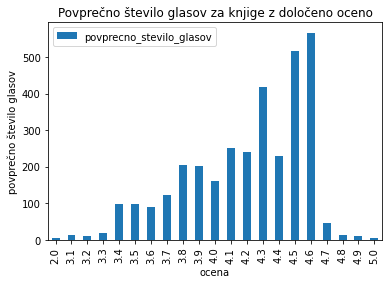

In [33]:
povprecno_glasovanje.plot.bar(x='ocena', y='povprecno_stevilo_glasov', xlabel='ocena',ylabel='povprečno število glasov', title='Povprečno število glasov za knjige z določeno oceno')

In [34]:
povprecno_glasovanje[povprecno_glasovanje.ocena == 4.5] #največ glasvo v povprečju

,ocena,povprecno_stevilo_glasov
0,4.5,516


In [35]:
knjige[knjige.stevilo_volilcev<500].naslov.count()

2792

In [36]:
round(knjige[knjige.stevilo_volilcev<500].naslov.count() / knjige.naslov.count() * 100,2)

93.07

Stolpični graf prikazuje koliko ljudi je v povprečju glasovalo za knjigo z določeno oceno, da spada na seznam Books That Everyone Should Read At Least Once. Iz grafa vidimo, da je knjiga z najslabšo in najboljšo oceno v povprečju glasovana malokrat. Največkrat so ljudje glasovali za knjige z oceno 4.5, 4.6 in 4.3. Menim, da je razlog za tako glasovanje, da so knjige z najboljšo in najslabšo oceno niso za vsakogar, kdor pa zanjo glasuje, jo ima rad. 
Najvišji stolpec predstavlja v povprečju 523 volilcev, ki so oddali svoj glas za knjigo s povprečno oceno 4.5.  
Nad rezultati sem bila presenečena, saj sem pričakovala višjo številko za povprečno število glasovalcev/volilcev na knjigo. Zato sem pogledala kolikšen je delež knjig, za katere je glasovalo manj kot 500 ljudi. Ugotovila sem, da je takih knjig 93,17%. Zato je napačno sklepanje po hitrem pogledu na podatke, da je le za zadnjih nekaj knjig glasovalo malo ljudi. In ravno ta vellik delež zniža povprečno število glasov za knjigo. 


<h3>Kako so knjige porazdeljene med ocenami?</h3>

<AxesSubplot:title={'center':'Število knjig za določeno oceno'}, xlabel='ocena', ylabel='število knjig'>

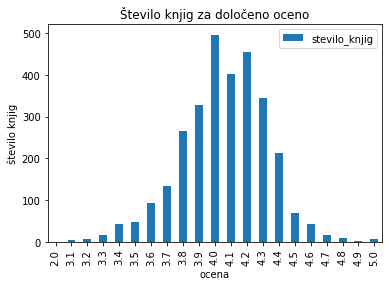

In [37]:
# ocene 
vsota = 0
stevilo_knjig_na_oceno = pd.DataFrame(columns = ['ocena', 'stevilo_knjig'])
for ocena in ocene:
    stevilo_vseh_knjig_z_oceno = knjige[knjige.ocena == ocena].naslov.count()
    df = pd.DataFrame([ 
        {'ocena':ocena,'stevilo_knjig':int(stevilo_vseh_knjig_z_oceno)}
        ])
    stevilo_knjig_na_oceno = stevilo_knjig_na_oceno.append(df) 
    vsota += stevilo_vseh_knjig_z_oceno 
if vsota != knjige.naslov.count():
    print('Napaka!')
stevilo_knjig_na_oceno.plot.bar(x='ocena',y='stevilo_knjig',xlabel='ocena',ylabel='število knjig', title='Število knjig za določeno oceno')

Kot pričakovano je knjig z oceno pod 3.3 malo, nato se število knjig povečuje in doseže vrh pri 4.0 in nato ponoven vrh pri 4.2. Nato pa se število knjig z povečevanjem povprečne ocene zmanjšuje. 